# 提示内容ごとの変化の散布図

- 人気・雰囲気の情報について5段階の表示ごとの変化を可視化
- 散布図は全て
 - 横軸：情報を提示しなかった場合の評価値（平均）
 - 縦軸：プライム情報を提示した場合の評価値（平均）
 - 図の各点は一曲のそれぞれの評価値の値を表す

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import matplotlib.cm as cm

In [2]:
with open('./data.pkl', 'rb') as f:
    data = pickle.load(f)
e_items = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'Valence', 'Arousal', 'like']
primes = ['none', 'popular', 'va', 'lyrics']
e_items_label = ['C1(堂々)', 'C2(元気が出る)', 'C3(切ない)', 'C4(激しい)', 'C5(滑稽)', 'C6(可愛い)', 'Valence', 'Arousal', '好感度']
with open('./primes.pkl', 'rb') as f:
    info = pickle.load(f)
# info

In [3]:
nones = data['primes_mean']['none']
vas = data['primes_mean']['va']
populars = data['primes_mean']['popular']

## 好感度の内容による変化

最高・高・中・低・最低それぞれ20曲ずつ

In [4]:
popular_index = []
for i in range(1, 6):
    popular_index.append(info[info['rank'] == i].index)
# popular_index

In [5]:
# populars.loc[popular_index[0], 'C1']

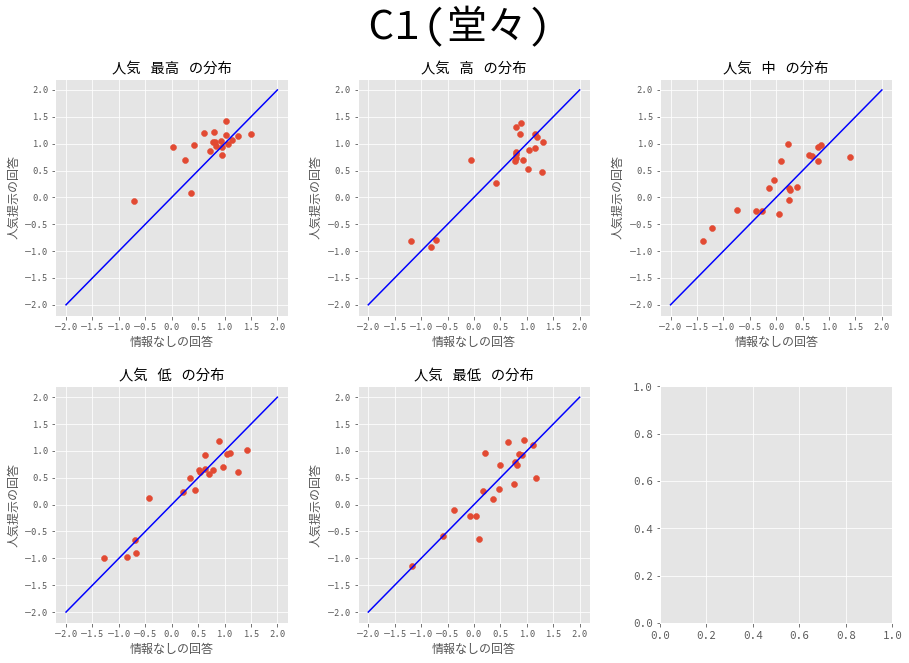

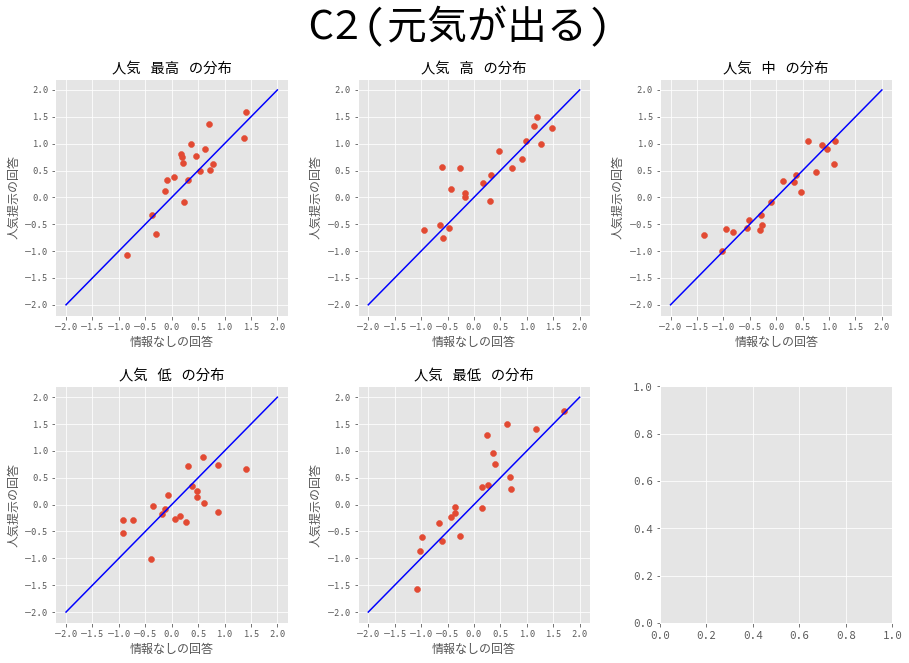

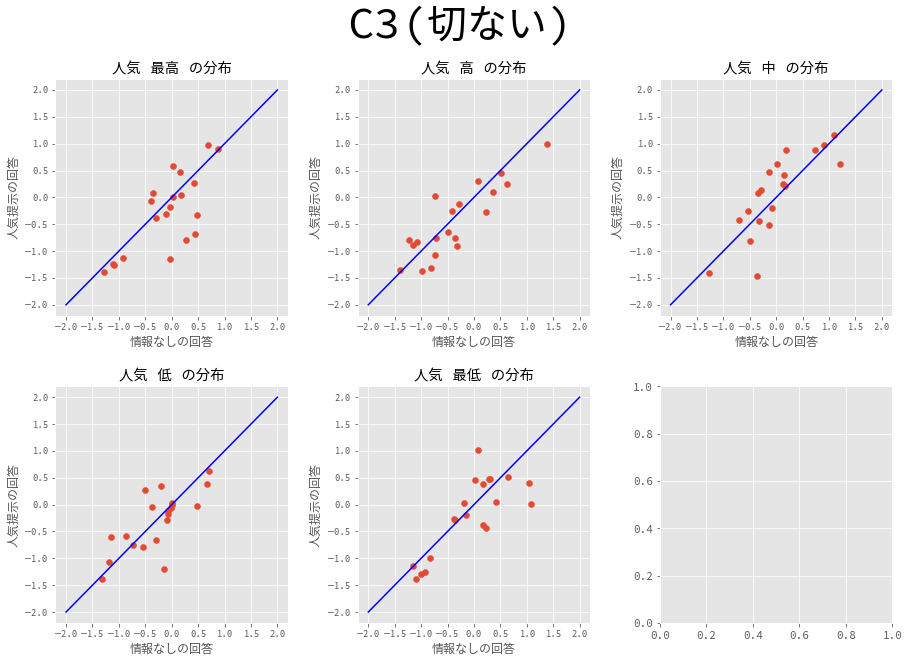

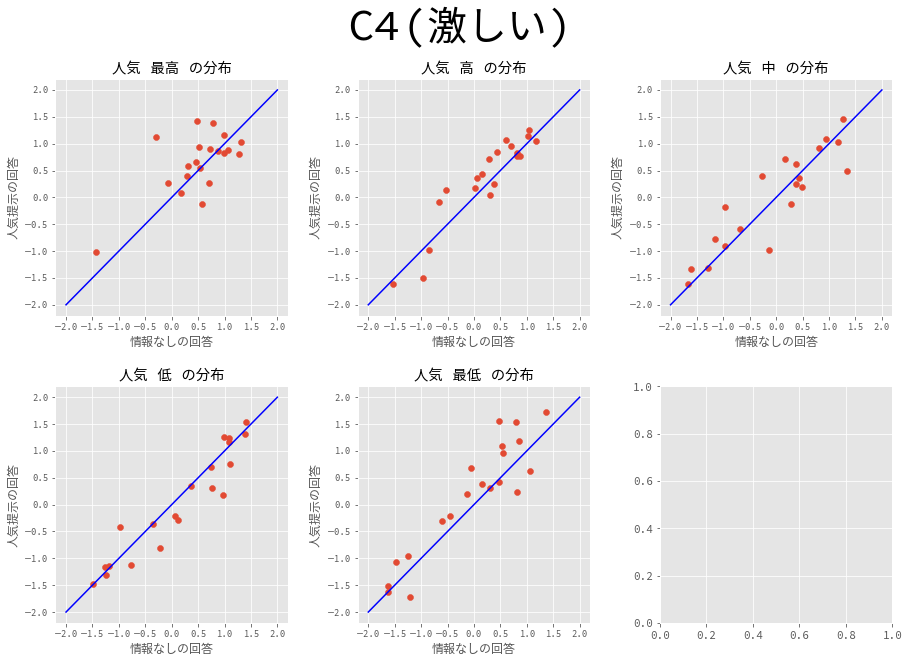

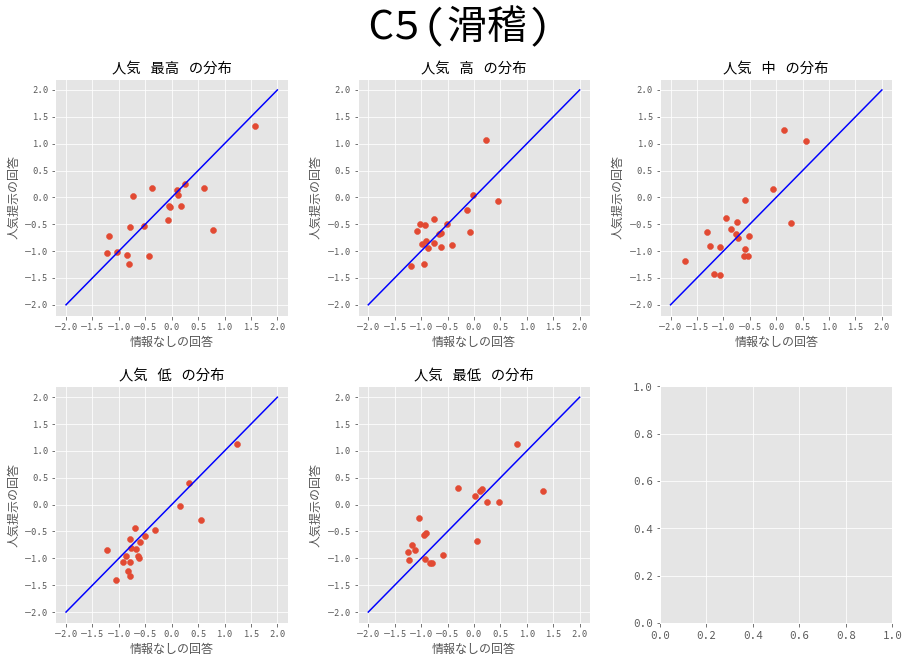

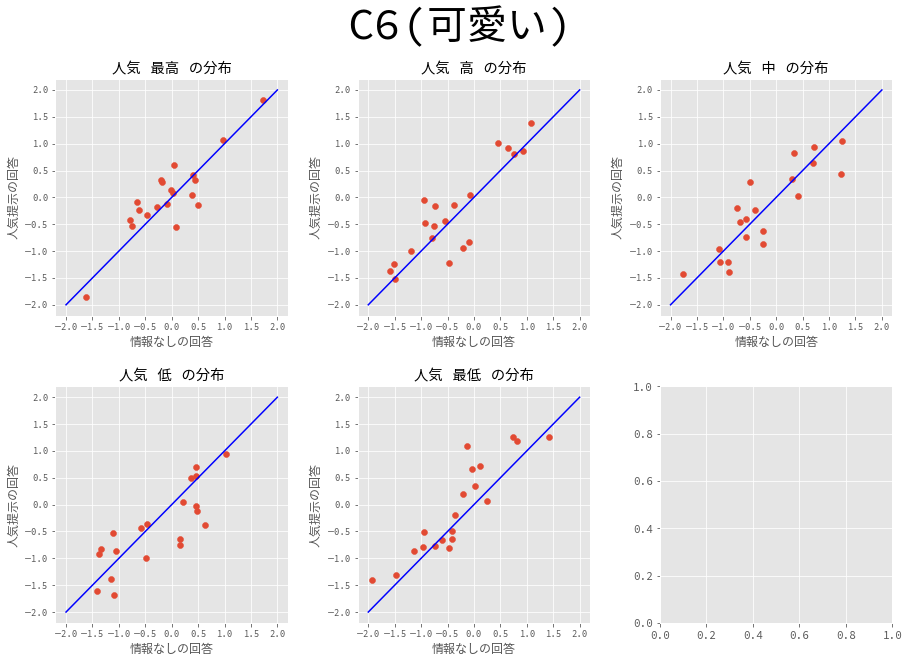

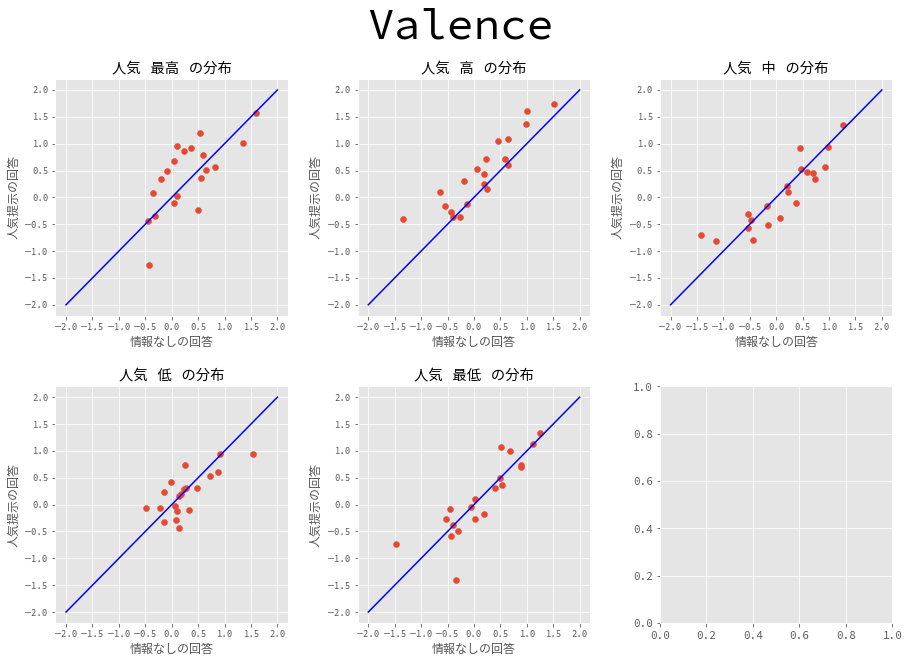

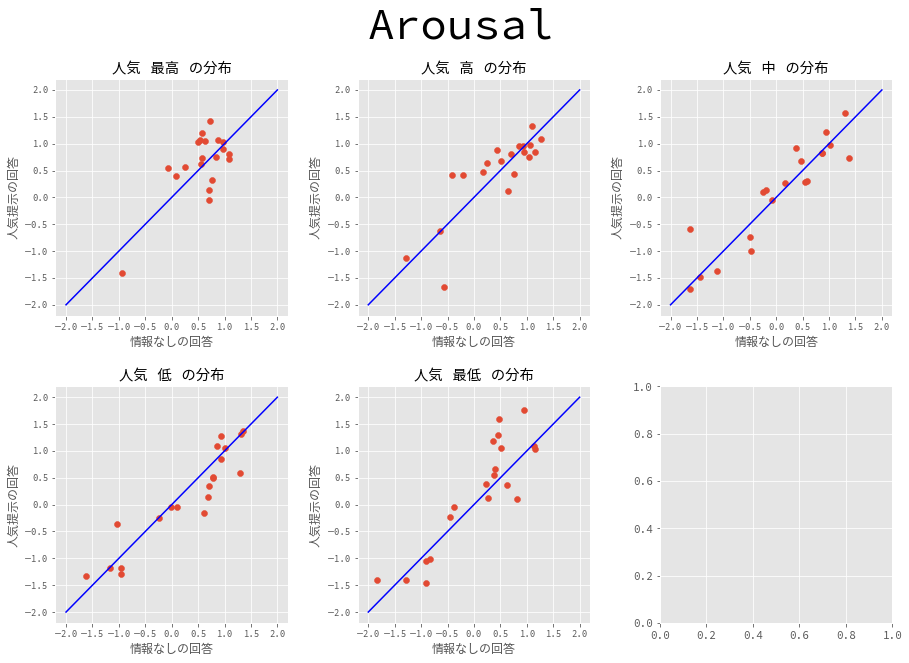

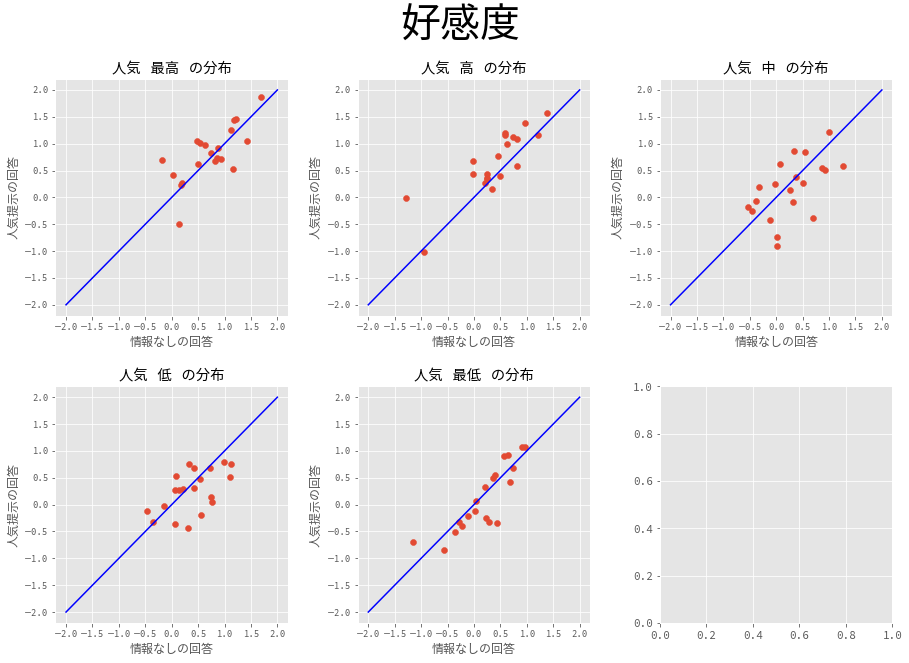

In [6]:
plt.clf()
plt.style.use('ggplot')
titles = ['最高', '高', '中', '低', '最低']

for j, e_item in enumerate(e_items):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('%s' % e_items_label[j], fontsize=40)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    for i, index in enumerate(popular_index):
        x = nones.loc[index, e_item].values + np.random.uniform(-0.1, 0.1, len(index))
        y = populars.loc[index, e_item].values + np.random.uniform(-0.1, 0.1, len(index))
        
        px =  int(i / 3)
        py = i % 3
        axes[px, py].scatter(x, y)
        axes[px, py].plot([-2, 2], [-2, 2], c='b')
        axes[px, py].set_title('人気 %s の分布' % titles[i])
        axes[px, py].tick_params(labelsize=8)
        axes[px, py].set_xticks(np.linspace(-2.0, 2.0, 9))
        axes[px, py].set_yticks(np.linspace(-2.0, 2.0, 9))
        axes[px, py].set_ylabel('人気提示の回答')
        axes[px, py].set_xlabel('情報なしの回答')
plt.show()

## 雰囲気の内容による変化

### Valence情報
＜楽曲数＞  
最高：14  
高：29  
中：31  
低：17  
最低：9  

In [7]:
v_index = []
v_index.append(info[(info['valence'] <= 2.0) & (info['valence'] >= 1.2)].index)
v_index.append(info[(info['valence'] < 1.2) & (info['valence'] >= 0.4)].index)
v_index.append(info[(info['valence'] < 0.4) & (info['valence'] >= -0.4)].index)
v_index.append(info[(info['valence'] < -0.4) & (info['valence'] >= -1.2)].index)
v_index.append(info[(info['valence'] < -1.2) & (info['valence'] >= -2.0)].index)
# for index in v_index:
#     print(len(index))
# v_index

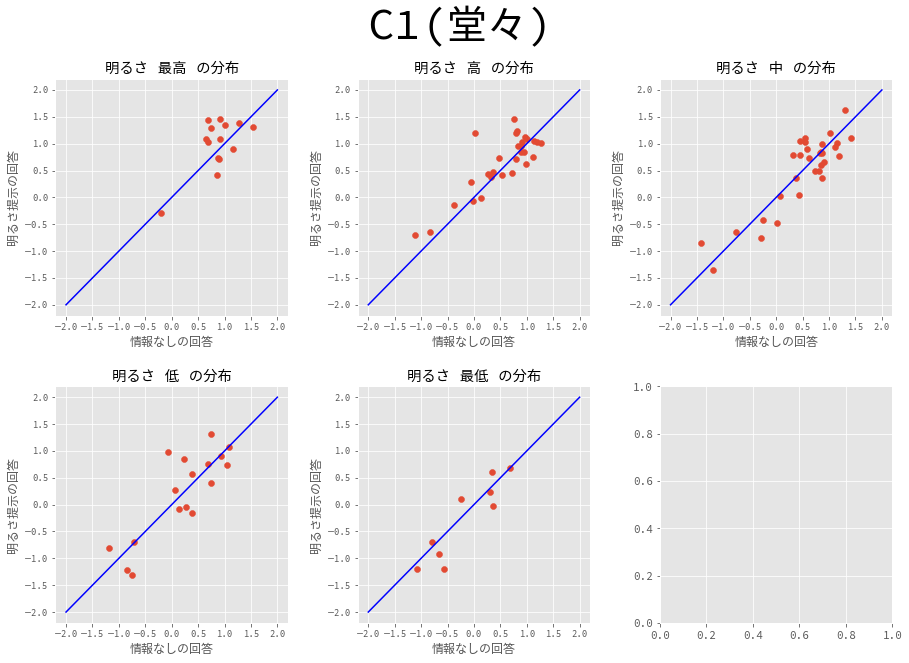

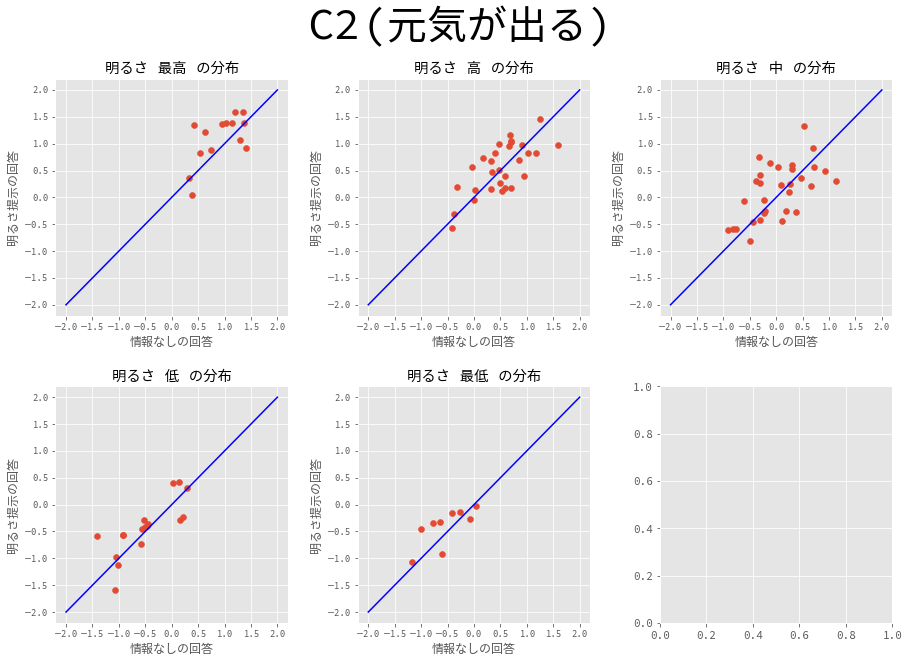

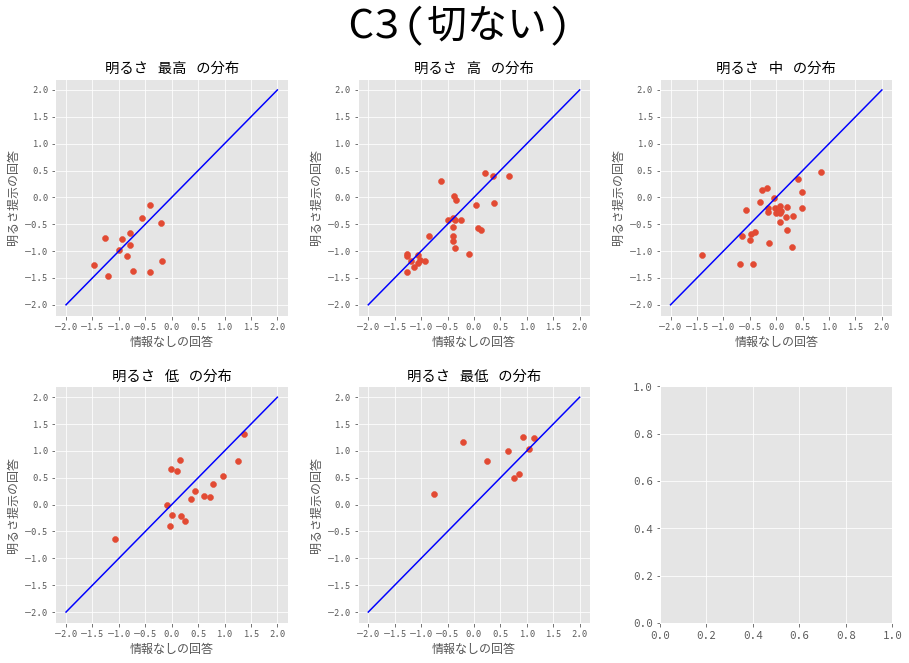

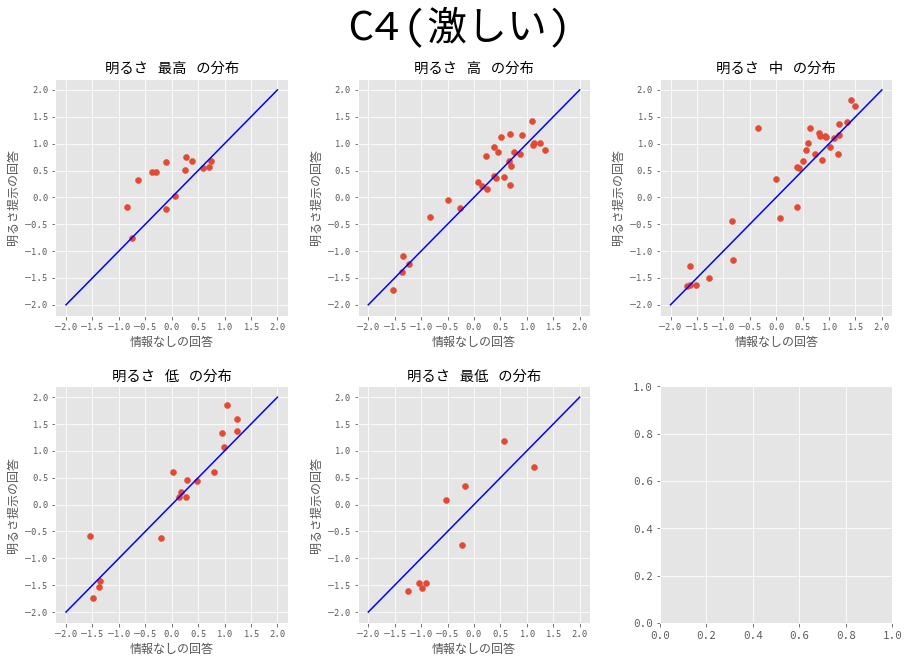

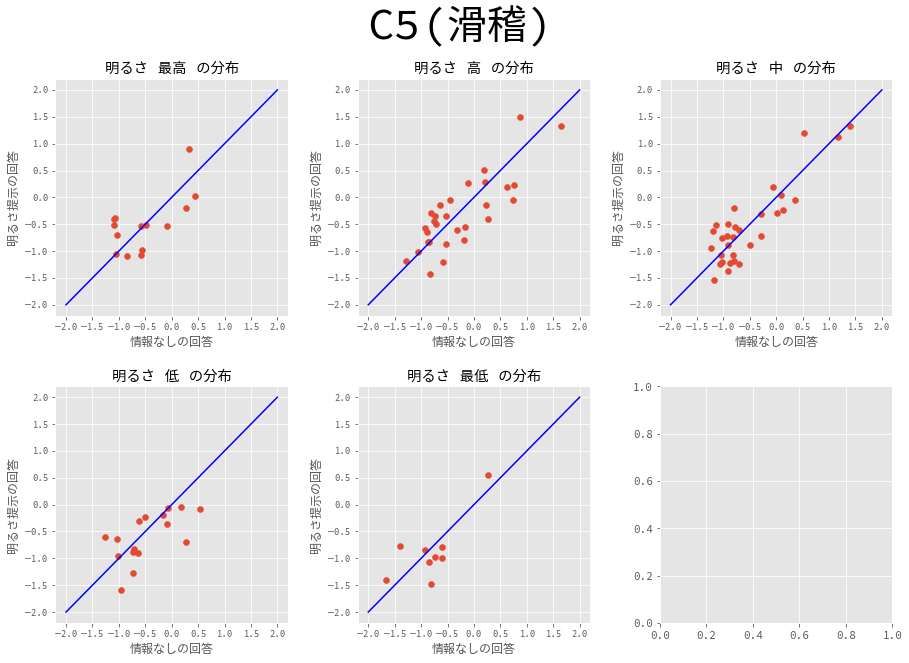

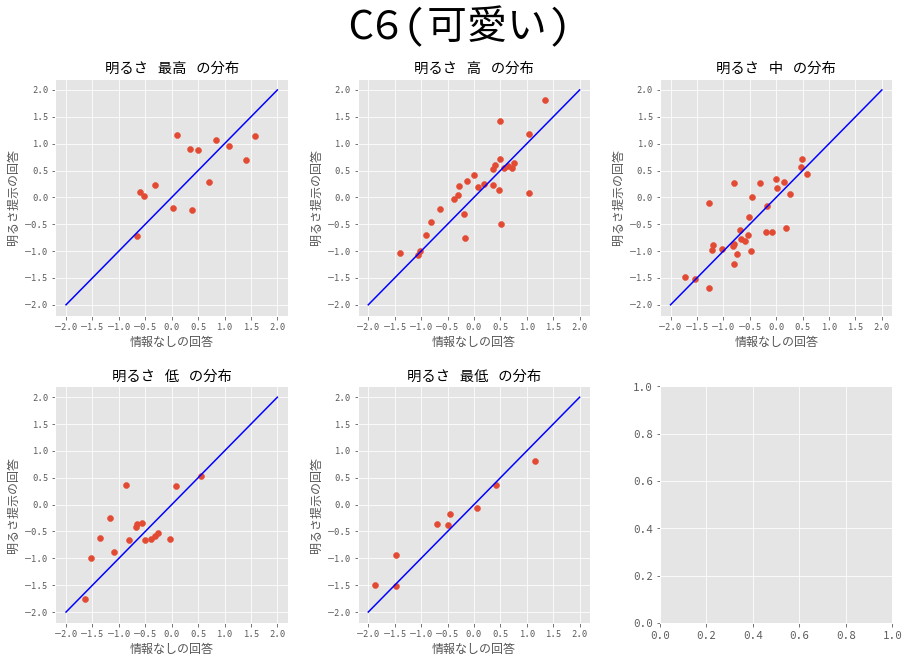

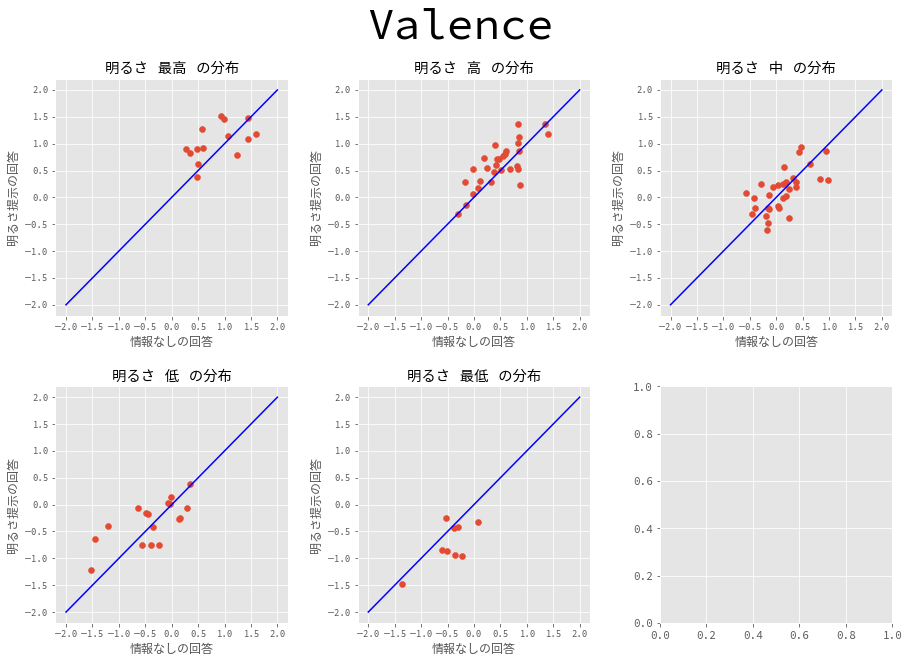

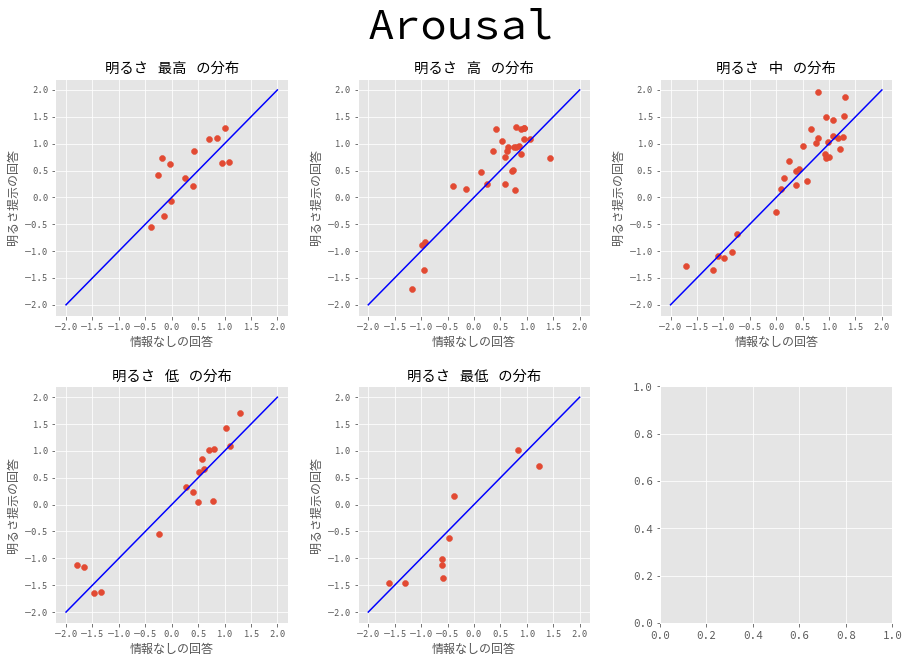

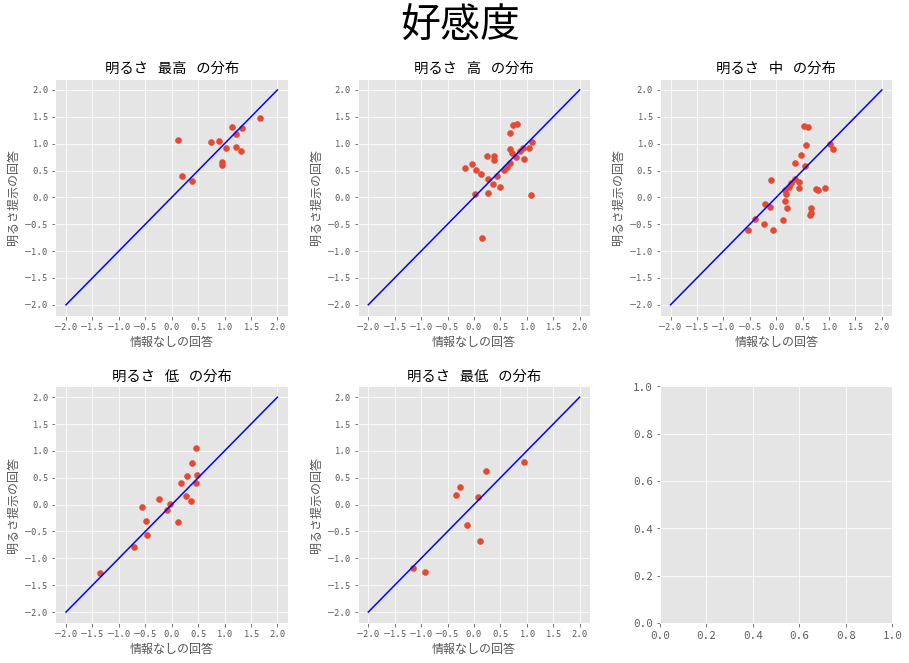

In [8]:
plt.clf()
plt.style.use('ggplot')
titles = ['最高', '高', '中', '低', '最低']

for j, e_item in enumerate(e_items):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('%s' % e_items_label[j], fontsize=40)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    for i, index in enumerate(v_index):
        x = nones.loc[index, e_item].values + np.random.uniform(-0.1, 0.1, len(index))
        y = vas.loc[index, e_item].values + np.random.uniform(-0.1, 0.1, len(index))
        
        px =  int(i / 3)
        py = i % 3
        axes[px, py].scatter(x, y)
        axes[px, py].plot([-2, 2], [-2, 2], c='b')
        axes[px, py].set_title('明るさ %s の分布' % titles[i])
        axes[px, py].tick_params(labelsize=8)
        axes[px, py].set_xticks(np.linspace(-2.0, 2.0, 9))
        axes[px, py].set_yticks(np.linspace(-2.0, 2.0, 9))
        axes[px, py].set_ylabel('明るさ提示の回答')
        axes[px, py].set_xlabel('情報なしの回答')
plt.show()

### Aeousal情報
＜楽曲数＞  
最高：19  
高：38  
中：21  
低：11  
最低：11  

In [9]:
a_index = []
a_index.append(info[(info['arousal'] <= 2.0) & (info['arousal'] >= 1.2)].index)
a_index.append(info[(info['arousal'] < 1.2) & (info['arousal'] >= 0.4)].index)
a_index.append(info[(info['arousal'] < 0.4) & (info['arousal'] >= -0.4)].index)
a_index.append(info[(info['arousal'] < -0.4) & (info['arousal'] >= -1.2)].index)
a_index.append(info[(info['arousal'] < -1.2) & (info['arousal'] >= -2.0)].index)
# for index in a_index:
#     print(len(index))
# a_index

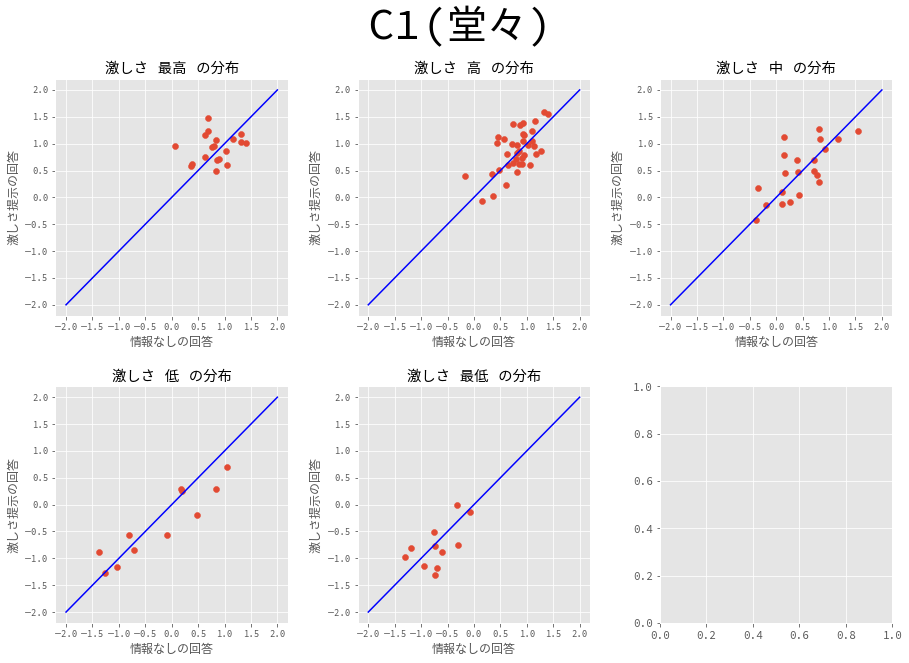

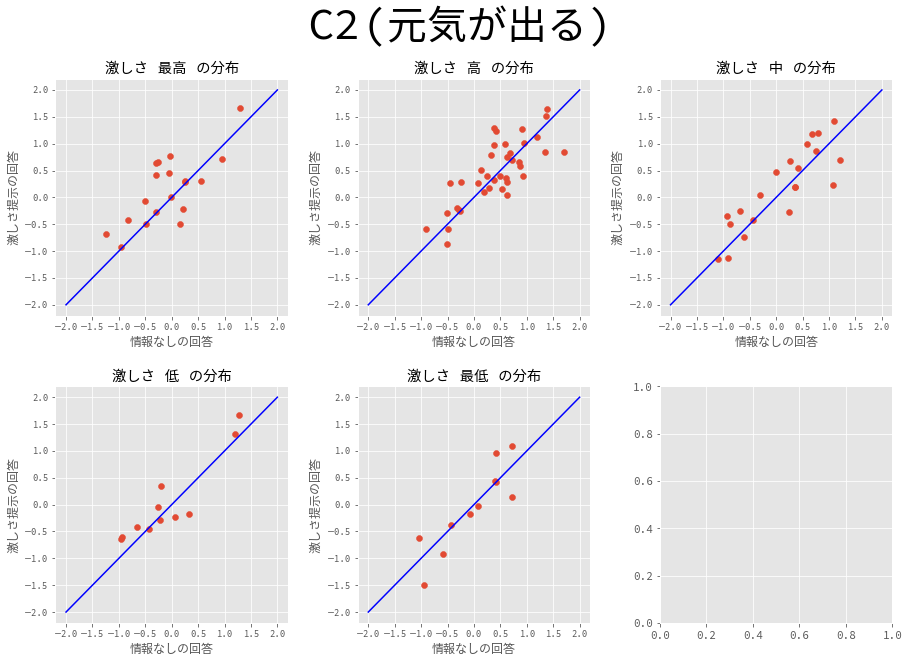

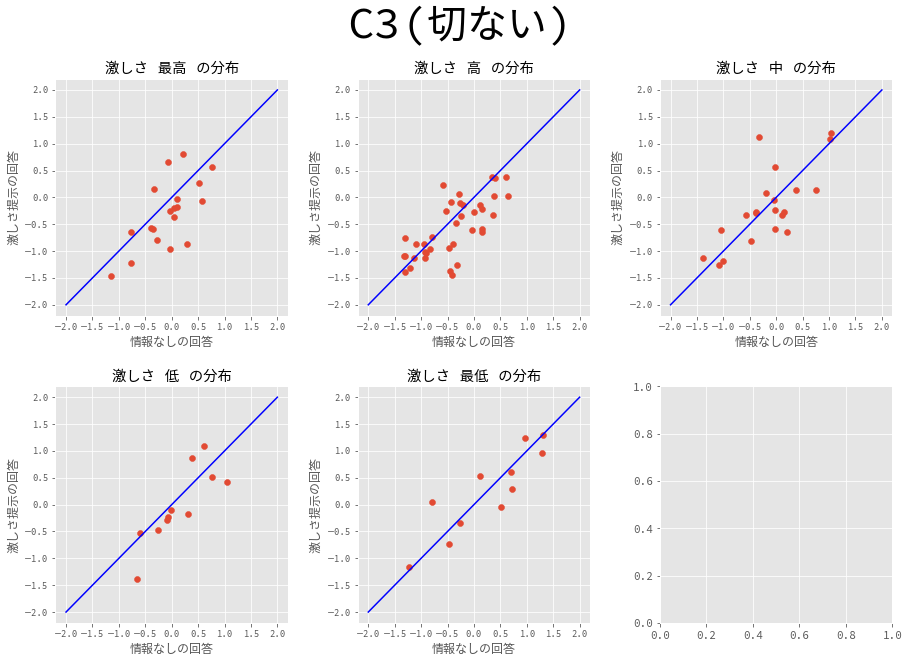

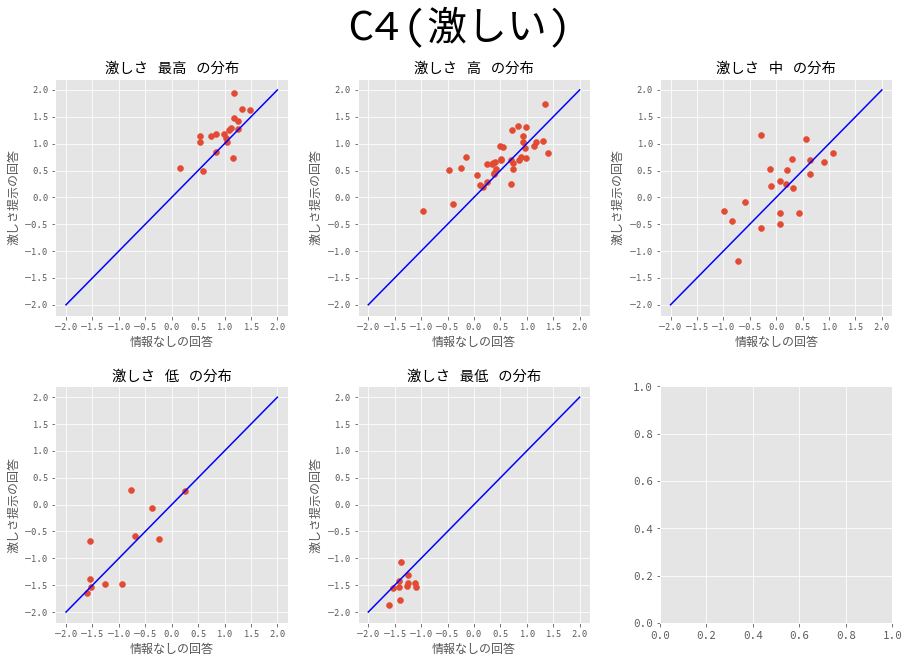

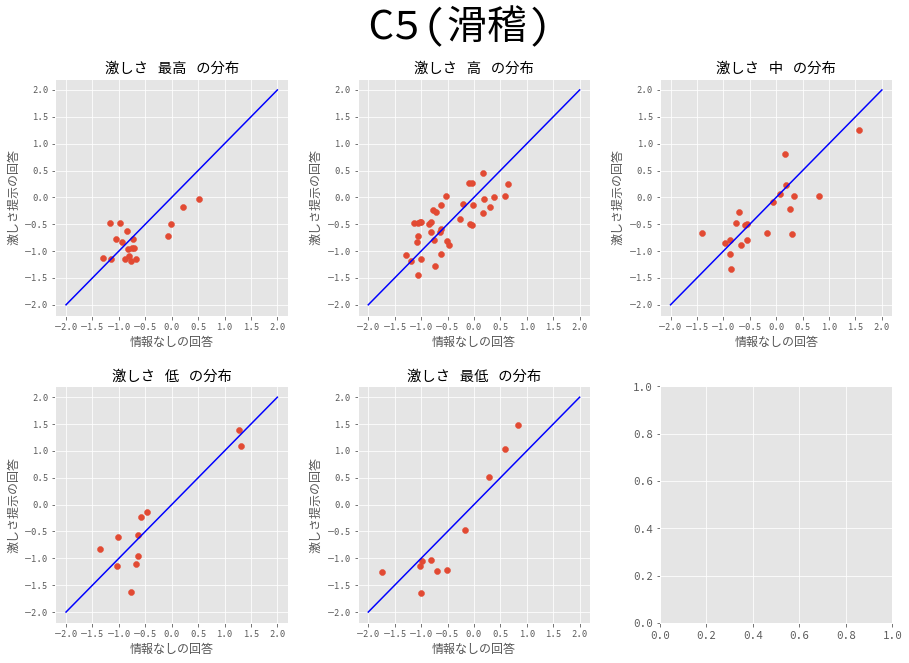

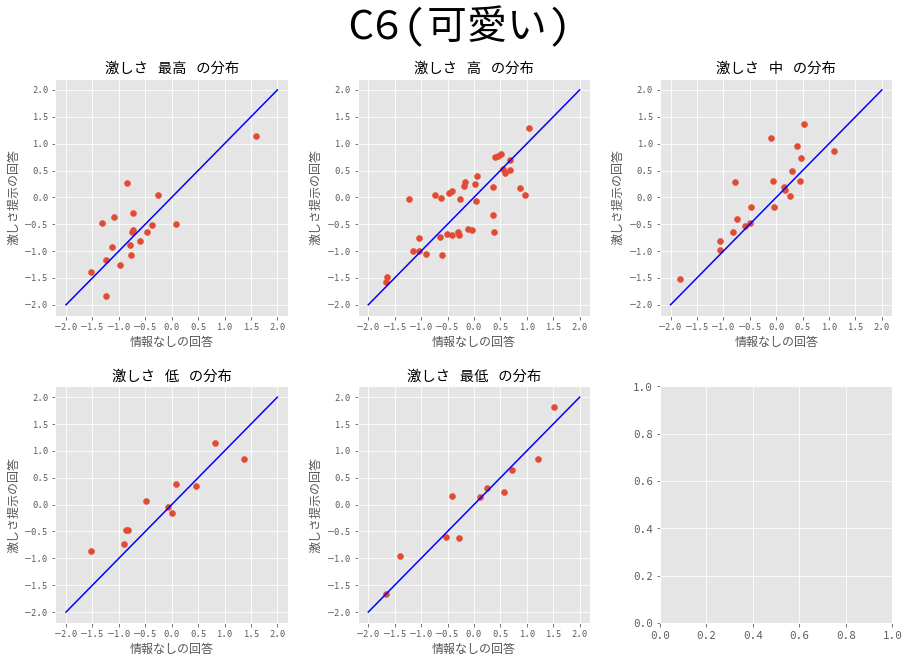

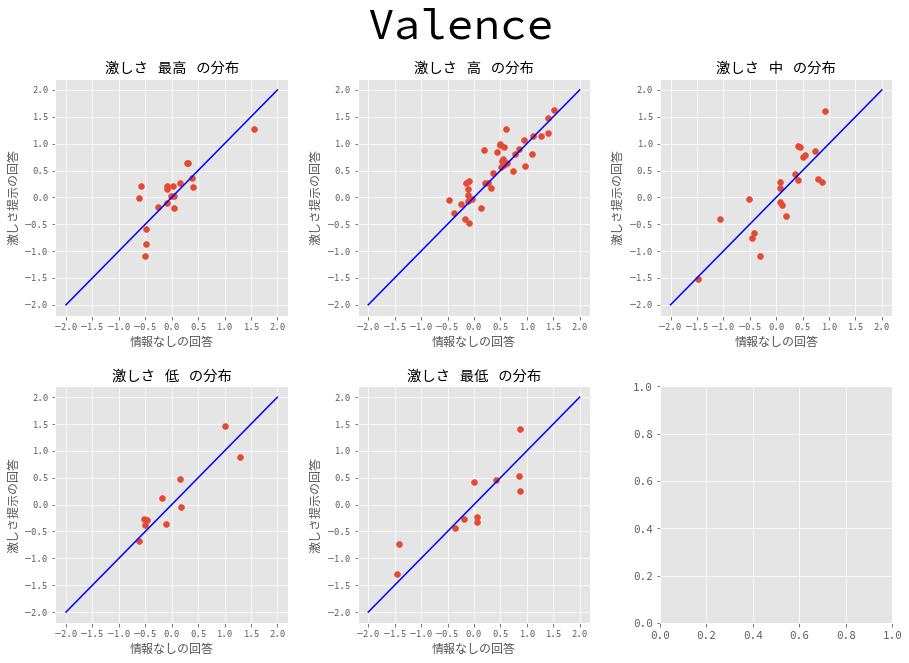

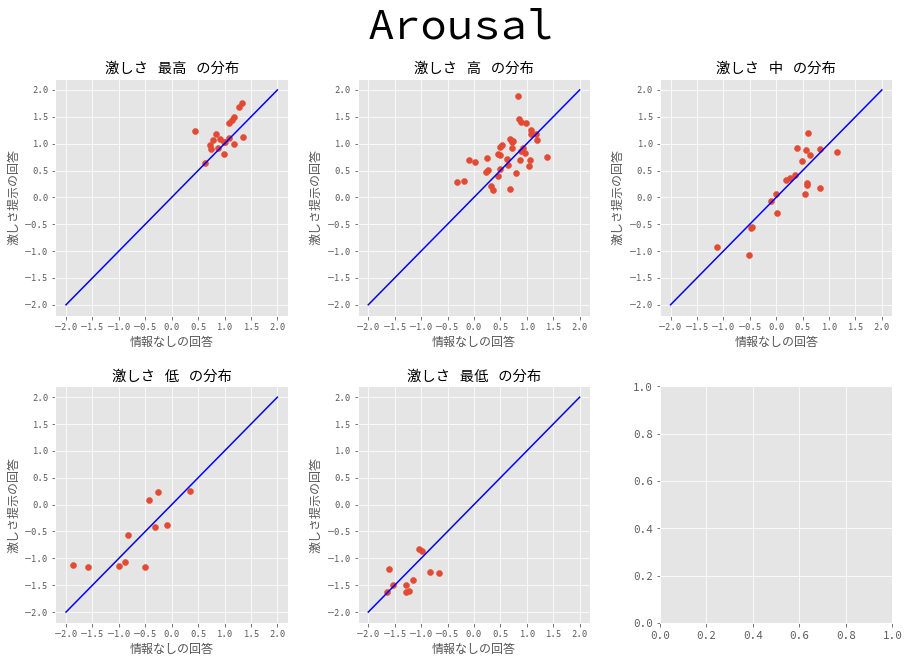

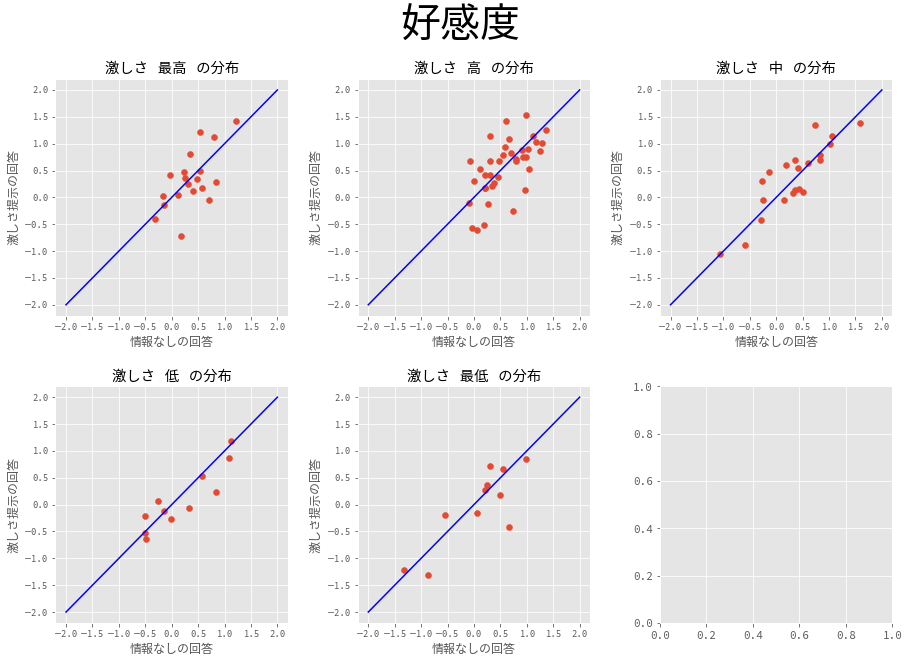

In [10]:
plt.clf()
plt.style.use('ggplot')
titles = ['最高', '高', '中', '低', '最低']

for j, e_item in enumerate(e_items):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('%s' % e_items_label[j], fontsize=40)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    for i, index in enumerate(a_index):
        x = nones.loc[index, e_item].values + np.random.uniform(-0.1, 0.1, len(index))
        y = vas.loc[index, e_item].values + np.random.uniform(-0.1, 0.1, len(index))
        
        px =  int(i / 3)
        py = i % 3
        axes[px, py].scatter(x, y)
        axes[px, py].plot([-2, 2], [-2, 2], c='b')
        axes[px, py].set_title('激しさ %s の分布' % titles[i])
        axes[px, py].tick_params(labelsize=8)
        axes[px, py].set_xticks(np.linspace(-2.0, 2.0, 9))
        axes[px, py].set_yticks(np.linspace(-2.0, 2.0, 9))
        axes[px, py].set_ylabel('激しさ提示の回答')
        axes[px, py].set_xlabel('情報なしの回答')
plt.show()